## Focus on NKT17 cells

In [1]:
# Import useful modules

import numpy as np
import pandas as pd
import scanpy as sc
import os
#import igraph
import matplotlib.pyplot as plt
import seaborn

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=130)

/home/lebrigand/.conda/envs/jupyter/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.3 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


In [2]:
adata_ann = sc.read_h5ad('./output/wt.ann.h5ad')
adata_raw = sc.read_h5ad('./output/wt.preprocessing.h5ad')
adata_raw.shape

(3290, 12958)

computing score 'score'
    finished: added
    'score', score of gene set (adata.obs) (0:00:00)


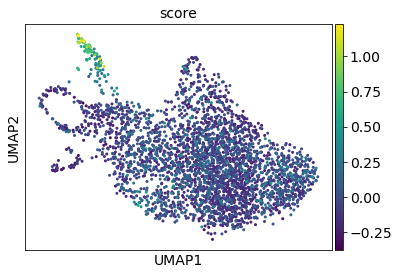

In [3]:
nkt17_genes = ['Rorc', 'Il1r1', 'Il17re', 'Ccr6', 'Ccr2', 'Il18r1', 'Il23r', 'Aqp3', 'Tmem176b']
sc.tl.score_genes(adata_ann, nkt17_genes, use_raw = True)
sc.pl.umap(adata_ann, color=['score'])

In [4]:
tokeep = adata_ann.obs['cell_type'] == ['NKT17']
list_of_cell_names = adata_ann.obs_names[tokeep]
adata = adata_raw[list_of_cell_names, ]
adata.obs['cell_type'] = adata_ann.obs['cell_type']
adata.obs['score'] = adata_ann.obs['score']
adata.shape

Trying to set attribute `.obs` of view, making a copy.


(92, 12958)

In [5]:
sc.pp.filter_genes(adata, min_cells=3)
adata.X.shape

filtered out 3981 genes that are detectedin less than 3 cells


(92, 8977)

In [6]:
adata.obs

,sample,n_genes,percent_mito,percent_ribo,n_counts,doublet_scores,predicted_doublets,doubletDetection,cell_type,score
index,,,,,,,,,,
AAACCTGGTTGTGGAG-1,wt,3893,0.024678,0.343328,12295.0,0.070213,False,0.0,NKT17,0.465839
AAAGTAGCACCACGTG-1,wt,1844,0.038488,0.416894,3204.0,0.107195,False,0.0,NKT17,0.480819
AAAGTAGCATGCGCAC-1,wt,2693,0.029961,0.427958,6455.0,0.051635,False,0.0,NKT17,0.101025
AACCGCGGTCTCATCC-1,wt,2021,0.040453,0.327812,3626.0,0.027381,False,0.0,NKT17,1.234001
AACTCCCTCGAGGTAG-1,wt,1955,0.029289,0.406943,3646.0,0.044776,False,0.0,NKT17,1.215884
...,...,...,...,...,...,...,...,...,...,...
TTCTCAAAGAGTTGGC-1,wt,2306,0.020539,0.379906,4591.0,0.046926,False,0.0,NKT17,0.709455
TTCTTAGGTGCACTTA-1,wt,3933,0.021262,0.347948,11991.0,0.094040,False,0.0,NKT17,0.281780
TTGTAGGGTTGACGTT-1,wt,2517,0.025525,0.419994,5742.0,0.078522,False,0.0,NKT17,0.422380


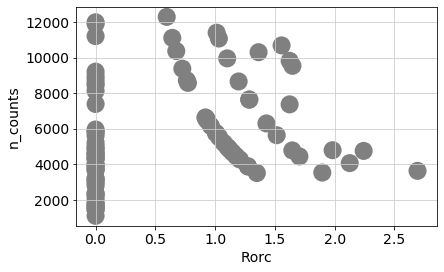

In [7]:
sc.pl.scatter(adata, x="Rorc", y="n_counts")

In [8]:
# filtering cells with less than 3000 UMIs
# to avoid n_counts biais in Rorc capture

tokeep = adata.obs['n_counts'] > 3000
list_of_cell_names = adata.obs_names[tokeep]
adata = adata[list_of_cell_names, ]
adata.shape

(78, 8977)

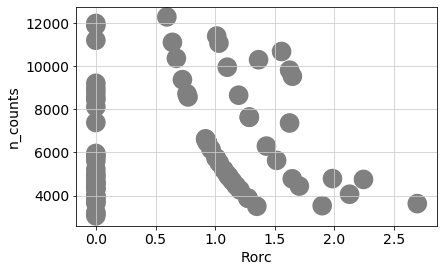

In [9]:
sc.pl.scatter(adata, x="Rorc", y="n_counts")

In [10]:
nkt17_genes = ['Rorc', 'Il1r1', 'Il17re', 'Ccr6', 'Ccr2', 'Il18r1', 'Il23r', 'Aqp3', 'Tmem176b']
sc.tl.score_genes(adata, nkt17_genes, use_raw = True)

computing score 'score'
    finished: added
    'score', score of gene set (adata.obs) (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


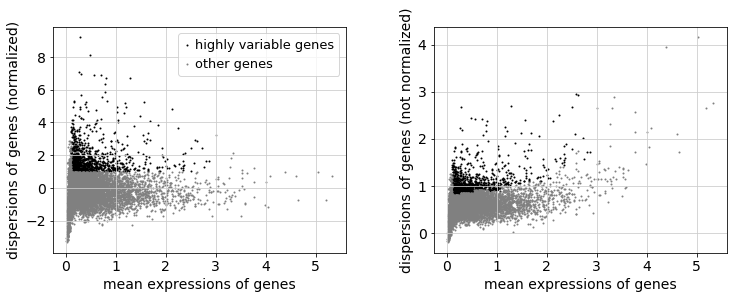

1018

In [11]:
#hvgs = adata_ko.var['highly_variable'].intersection(adata_wt.var['highly_variable'])
sc.pp.highly_variable_genes(adata, min_mean=0.1, max_mean=3, min_disp=1)
sc.pl.highly_variable_genes(adata)
np.sum(adata.var['highly_variable'])

In [12]:
sc.pp.scale(adata, max_value=10)

In [13]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00)


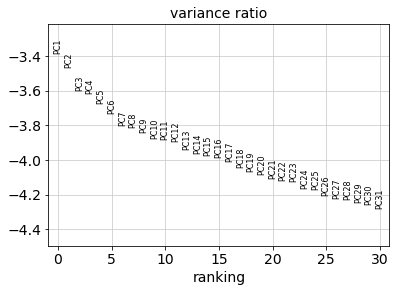

In [14]:
sc.pl.pca_variance_ratio(adata, log=True)

In [15]:
sc.pp.neighbors(adata, n_pcs = 6)

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 2 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


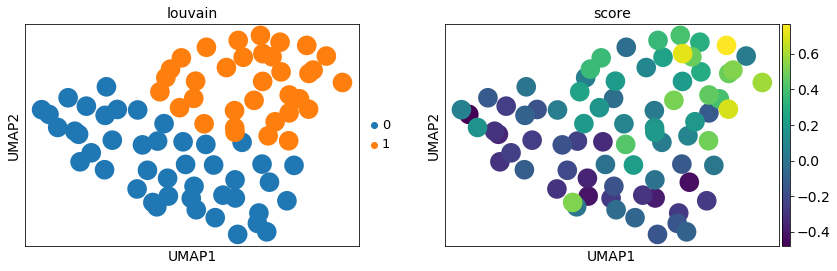

In [17]:
sc.tl.louvain(adata, resolution=0.4)
sc.pl.umap(adata, color=['louvain',"score"])

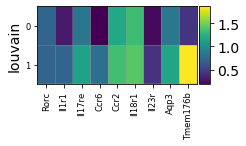

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[2.88, 0, 0.2])

In [18]:
sc.pl.matrixplot(adata, nkt17_genes, groupby='louvain')

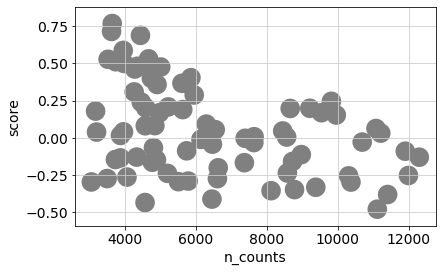

In [19]:
sc.pl.scatter(adata, x="n_counts", y="score")

In [20]:
#vect = []
#for i in range(0, len(adata.obs)):
#    if (adata[i, 'Rorc'].X > 0) :
#        vect = vect + ["Rorc+"]
#    else :
#        vect = vect + ["Rorc-"]
    
#adata.obs['groups'] = vect

In [21]:
sc.tl.rank_genes_groups(adata, groupby = 'louvain')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [22]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

#clusters = []
#genes = []
#logFC = []
#score = []
#pvals = []
#pvals_adj = []

#for cl in inverted_cell_type_nb.keys():
#    clusters = clusters + ([inverted_cell_type_nb[cl]]*len(adata.uns['rank_genes_groups']['names'][str(cl)]))
#    genes = genes + adata.uns['rank_genes_groups']['names'][str(cl)].tolist()
#    logFC = logFC + adata.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
#    score = score + adata.uns['rank_genes_groups']['scores'][str(cl)].tolist()
#    pvals = pvals + adata.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
#    pvals_adj = pvals_adj + adata.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
#markers = pd.DataFrame(data = {'clusters': clusters,
#                              'genes':genes,
#                              'logFC':logFC,
#                              'score':score,
#                              'pvals':pvals,
#                              'pvals_adj':pvals_adj,
#                              })

#markers.to_csv(path_or_buf = 'markers.tsv', sep = '\t', index = False)

,0,1
0,Kcnn4,Tmem176a
1,Slamf6,Tmem176b
2,Ran,Blk
3,Ifi27l2a,Cited4
4,Tspan32,Cd7
5,Ptma,Ly6g5b
6,Pcbd2,Cd82
7,Tesc,Igf1r
8,Psma7,Ccr6
9,Igfbp4,Mycn


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`


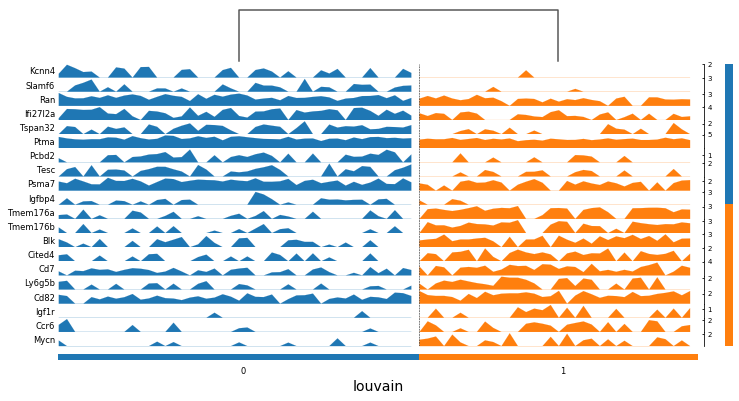

In [23]:
sc.pl.rank_genes_groups_tracksplot(adata, n_genes=10)

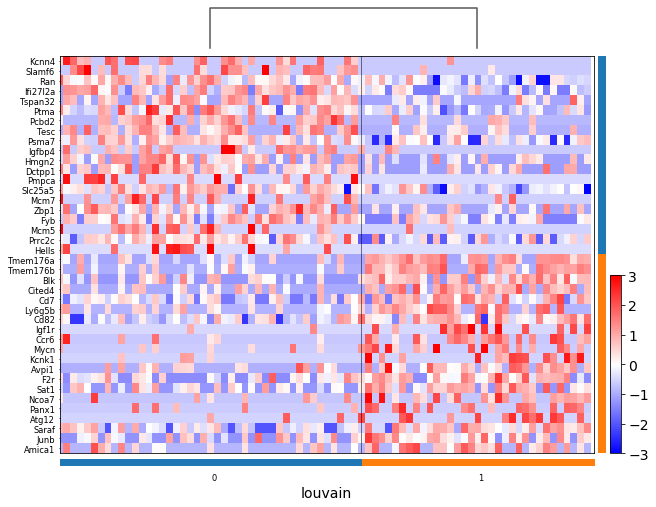

In [24]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=20, key='rank_genes_groups',
                                swap_axes=True, use_raw=False, vmax=3, vmin=-3, cmap='bwr', dendrogram=True)